# Maximum Likelihood vs CDF-Fit (Spiral B)

In [1]:
from math import exp, log, sqrt
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit

from LocUtil import LogGrid1, Grid1, MinMax, UnZip

In [2]:
aTrue = 0.3
dataFile = '../Data/DistA_0.3.log'

nPlot = 101

#### Read Data

In [3]:
with open(dataFile, 'r') as file:
	lines = file.readlines()
data = [eval(l) for l in lines]

In [4]:
sampInfo,mleInfo,cdfInfo = UnZip(data)

nL,_,_ = UnZip(sampInfo)
mleEst,_ = UnZip(mleInfo)
cdfEst,_ = UnZip(cdfInfo)

In [5]:
nMin,nMax = MinMax(nL)

In [6]:
nLog = tuple(log(n) for n in nL)

In [7]:
mleErr = tuple(est - aTrue for est in mleEst)
mleErrAbs = tuple(abs(e) for e in mleErr)
mleLogErr = tuple(log(e) for e in mleErrAbs)

In [8]:
cdfErr = tuple(est - aTrue for est in cdfEst)
cdfErrAbs = tuple(abs(e) for e in cdfErr)
cdfLogErr = tuple(log(e) for e in cdfErrAbs)

## Fit Allowing Power to Adjust

In [9]:
linForm = lambda x,a0,a1: a0 + a1*x

In [10]:
mleParam,_ = curve_fit(linForm, nLog,mleLogErr)
mleParam

array([ 0.01199301, -0.52520715])

In [11]:
cdfParam,_ = curve_fit(linForm, nLog,cdfLogErr)
cdfParam

array([ 0.04429228, -0.5296045 ])

### Maximum Likelihood

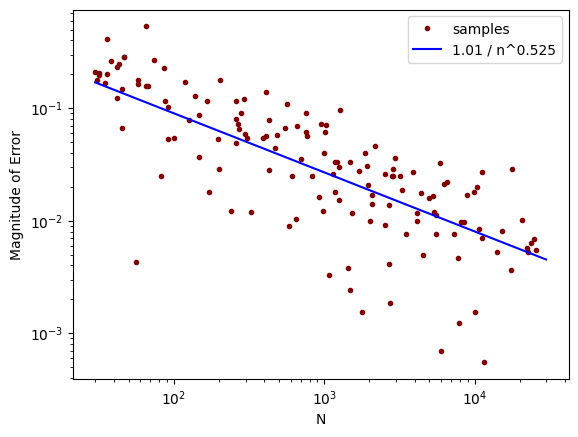

In [12]:
plot.loglog(nL, mleErr, '.', color='maroon', label='samples')

nGrid = LogGrid1(nMin,nMax, nPlot)

a0,a1 = mleParam
fitGrid = [exp(a0) * n**a1 for n in nGrid]
text = f'{exp(a0):.2f} / n^{-a1:.3f}'
plot.loglog(nGrid, fitGrid, c='blue', label=text)

plot.xlabel('N')
plot.ylabel('Magnitude of Error')
plot.legend()

### CDF-Fit

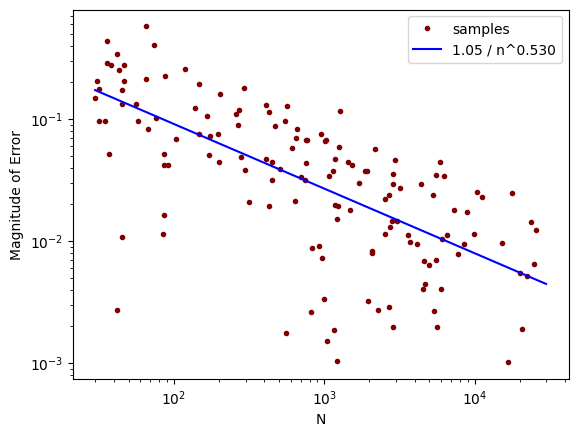

In [13]:
plot.loglog(nL, cdfErr, '.', color='maroon', label='samples')

nGrid = LogGrid1(nMin,nMax, nPlot)

a0,a1 = cdfParam
fitGrid = [exp(a0) * n**a1 for n in nGrid]
text = f'{exp(a0):.2f} / n^{-a1:.3f}'
plot.loglog(nGrid, fitGrid, c='blue', label=text)

plot.xlabel('N')
plot.ylabel('Magnitude of Error')
plot.legend()

## Fit Assuming One Over Square-Root of N

In [31]:
kolmoForm = lambda n, k: k - n/2

In [32]:
mleParam, _ = curve_fit(kolmoForm, nLog, mleLogErr)
mleParam

array([-0.16365491])

In [33]:
cdfParam, _ = curve_fit(kolmoForm, nLog, cdfLogErr)
cdfParam

array([-0.16199716])

### Maximum Likelihood

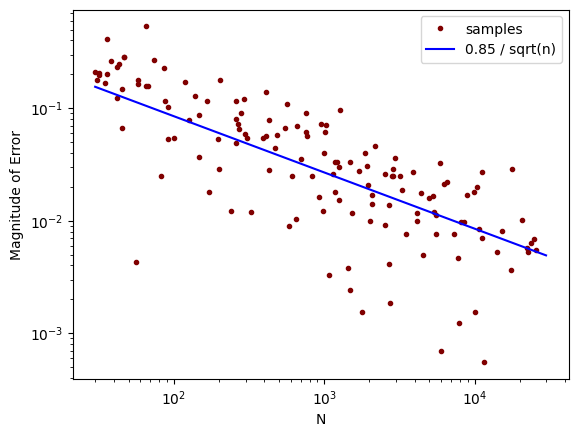

In [34]:
plot.loglog(nL, mleErr, '.', color='maroon', label='samples')

nGrid = LogGrid1(nMin,nMax, nPlot)

k = mleParam[0]
fitGrid = [exp(k) / sqrt(n) for n in nGrid]
text = f'{exp(k):.2f} / sqrt(n)'
plot.loglog(nGrid, fitGrid, c='blue', label=text)

plot.xlabel('N')
plot.ylabel('Magnitude of Error')
plot.legend()

### CDF-Fit

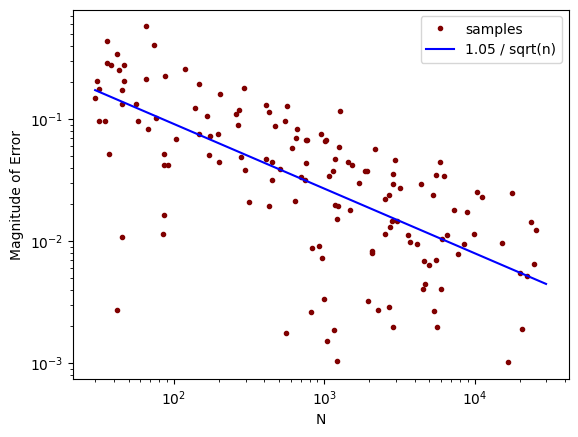

In [35]:
plot.loglog(nL, cdfErr, '.', color='maroon', label='samples')

nGrid = LogGrid1(nMin,nMax, nPlot)

k = cdfParam[0]
fitGrid = [exp(a0) * n**a1 for n in nGrid]
text = f'{exp(a0):.2f} / sqrt(n)'
plot.loglog(nGrid, fitGrid, c='blue', label=text)

plot.xlabel('N')
plot.ylabel('Magnitude of Error')
plot.legend()

## Pair Match

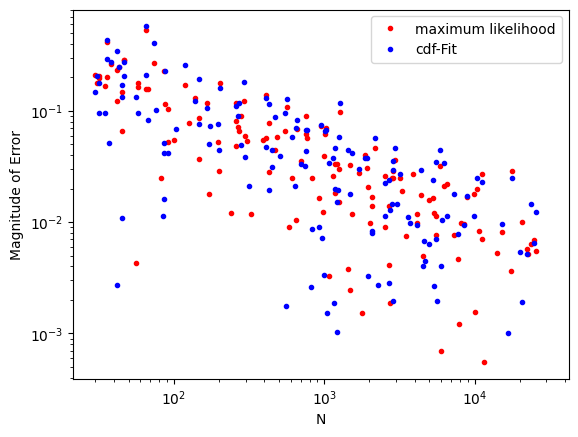

In [38]:
plot.loglog(nL, mleErr, '.', color='red', label='maximum likelihood')
plot.loglog(nL, cdfErr, '.', color='blue', label='cdf-Fit')

plot.xlabel('N')
plot.ylabel('Magnitude of Error')
plot.legend()

There appears to be near random superiority